In [ ]:
# pip install MySQL

-------------------

## 1. Base de datos MySQL

Dado el siguiente esquema de base de datos:

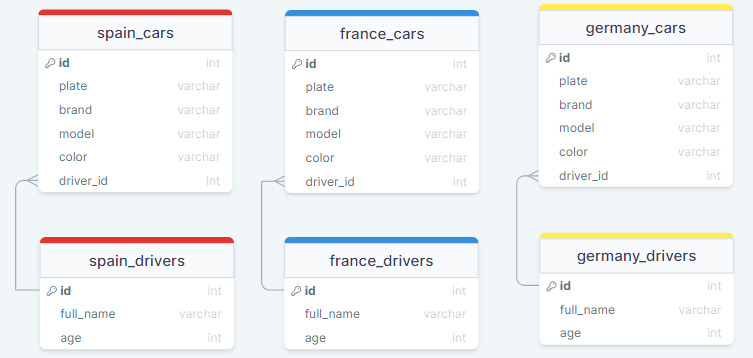



In [2]:
import mysql.connector 
from mysql.connector import Error

# Crea una conexión a la base de datos con los parámetros proporcionados
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection


# Ejecuta una query de lectura de la base de datos y la devuelve
def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")


# Ejecuta una query en la base de datos
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")
        
# insert multiple en tablas
def insert_multiple(query ,values):
    connection=create_db_connection("localhost", "root", "miguel", "ddbb")
    try:
        cursor = connection.cursor()
        cursor.executemany(query, values)
        connection.commit()
        print("Multiple insert successful")
    except Error as err:
        print(f"Error: '{err}'")
    
    
# Crear base de datos
def create_db(host_name, user_name, user_password, db_name):
    conexion=mysql.connector.connect(
    host=host_name,
    user=user_name,
    password=user_password
)
    
    try:
        cursor=conexion.cursor()
        cursor.execute('CREATE DATABASE '+ db_name)
        print("Created DB successful")
    except Error as err:
        print(f"Error: '{err}'")
    
# Crear tablas
def create_table(host_name, user_name, user_password, db_name,table_name, vals):
    conexion=create_db_connection(host_name,user_name,user_password,db_name)
    
    try:
        cursor=conexion.cursor()
        cursor.execute("CREATE TABLE " + table_name + vals)
        print("Created table successful")
    except Error as err:
        print(f"Error: '{err}'")

In [3]:
#Creación BBDD
ddbb= create_db("localhost", "root", "miguel", "ddbb")

Created DB successful


In [4]:
spain_drivers= create_table("localhost", "root", "miguel", "ddbb","spain_drivers","(id INT PRIMARY KEY, full_name VARCHAR(255), age INT )")
spain_cars=create_table("localhost", "root", "miguel", "ddbb","spain_cars","(id INT AUTO_INCREMENT PRIMARY KEY, plate VARCHAR(255), brand VARCHAR(255), model VARCHAR(255), color VARCHAR(255), driver_id INT, FOREIGN KEY (driver_id) REFERENCES spain_drivers(id))")

MySQL Database connection successful
Created table successful
MySQL Database connection successful
Created table successful


In [5]:
france_drivers= create_table("localhost", "root", "miguel", "ddbb","france_drivers","(id INT PRIMARY KEY, full_name VARCHAR(255), age INT )")
france_cars=create_table("localhost", "root", "miguel", "ddbb","france_cars","(id INT AUTO_INCREMENT PRIMARY KEY, plate VARCHAR(255), brand VARCHAR(255), model VARCHAR(255), color VARCHAR(255), driver_id INT, FOREIGN KEY (driver_id) REFERENCES france_drivers(id))")

MySQL Database connection successful
Created table successful
MySQL Database connection successful
Created table successful


In [6]:
germany_drivers= create_table("localhost", "root", "miguel", "ddbb","germany_drivers","(id INT PRIMARY KEY, full_name VARCHAR(255), age INT )")
germany_cars=create_table("localhost", "root", "miguel", "ddbb","germany_cars","(id INT AUTO_INCREMENT PRIMARY KEY, plate VARCHAR(255), brand VARCHAR(255), model VARCHAR(255), color VARCHAR(255), driver_id INT, FOREIGN KEY (driver_id) REFERENCES germany_drivers(id))")

MySQL Database connection successful
Created table successful
MySQL Database connection successful
Created table successful


Insertar valores

In [7]:
query="INSERT INTO spain_drivers (id, full_name, age) VALUES (%s,%s,%s)"
values=[(1,'Miguel',24),(2,'Sandra',26),(3,'Juan',34)]
spain_drivers=insert_multiple(query,values)
query="INSERT INTO spain_cars (id, plate, brand, model, color, driver_id) VALUES (%s,%s,%s,%s,%s,%s)"
values=[(1,'1111 BBB','ford','focus','red',1),(2,'1112 CCC','ford','mondeo','red',2),(3,'1113 DDD','ford','focus','blue',3)]
spain_cars=insert_multiple(query,values)

MySQL Database connection successful
Multiple insert successful
MySQL Database connection successful
Multiple insert successful


In [8]:
insert_query="INSERT INTO germany_drivers (id, full_name, age) VALUES (%s,%s,%s)"
values=[(1,'Günther Müller',54)]
germany_drivers=insert_multiple(insert_query,values)
insert_query="INSERT INTO germany_cars (id, plate, brand, model, color, driver_id) VALUES (%s,%s,%s,%s,%s,%s)"
values=[(1,'ABC DK 123','Audi','R8','grey',1)]
germany_cars=insert_multiple(insert_query,values)

MySQL Database connection successful
Multiple insert successful
MySQL Database connection successful
Multiple insert successful


In [9]:
insert_query="INSERT INTO france_drivers (id, full_name, age) VALUES (%s,%s,%s)"
values=[(1,'Benoît Dubois',44)]
france_drivers=insert_multiple(insert_query,values)
insert_query="INSERT INTO france_cars (id, plate, brand, model, color, driver_id) VALUES (%s,%s,%s,%s,%s,%s)"
values=[(1,'AA-001-AA','Citroën','C4','brown',1)]
france_cars=insert_multiple(insert_query,values)

MySQL Database connection successful
Multiple insert successful
MySQL Database connection successful
Multiple insert successful


#### 1.1 - Select simple

Escribe una query que devuelva todos los conductores de más de 25 años en España con un coche rojo:


In [10]:
simple_query = """
SELECT spain_drivers.full_name, spain_drivers.age, spain_cars.model, spain_cars.color 
FROM spain_drivers INNER JOIN spain_cars ON spain_cars.driver_id = spain_drivers.id WHERE spain_cars.color ='red' AND age>25
"""

connection = create_db_connection("localhost", "root", "miguel", "ddbb")
results = read_query(connection, simple_query) # Ejecuta la query en la db y almacena los resultados en results
for x in results:
    print(x)

MySQL Database connection successful
('Sandra', 26, 'mondeo', 'red')


#### 1.2 - Select avanzado

Teniendo en cuenta que un coche puede no estar asignado a nadie.

Escribe una query que devuelva las matrículas \[*plate*] de los coches y el nombre del conductor al que ese coche esté asignado \[*full_name*] en toda Europa:


In [11]:
advanced_query = """SELECT plate, full_name FROM(
   SELECT spain_cars.plate, spain_drivers.full_name FROM spain_cars INNER JOIN spain_drivers ON spain_cars.driver_id=spain_drivers.id
   
   UNION ALL
   
   SELECT france_cars.plate, france_drivers.full_name FROM france_cars INNER JOIN france_drivers ON france_cars.driver_id=france_drivers.id
   
   UNION ALL
   
   SELECT germany_cars.plate, germany_drivers.full_name FROM germany_cars INNER JOIN germany_drivers ON germany_cars.driver_id=germany_drivers.id) sub"""

connection = create_db_connection("localhost", "root", "miguel", "ddbb")
results = read_query(connection, advanced_query) # Ejecuta la query en la db y almacena los resultados en results
for x in results:
    print(x)

MySQL Database connection successful
('1111 BBB', 'Miguel')
('1112 CCC', 'Sandra')
('1113 DDD', 'Juan')
('AA-001-AA', 'Benoît Dubois')
('ABC DK 123', 'Günther Müller')


#### 1.3 - Create

Crea una tabla en la que se pueda almacenar la información obtenida con el SELECT anterior:


In [12]:
create_query = """
CREATE TABLE eu_drivers(plate VARCHAR(10), name VARCHAR(30) )
"""

connection = create_db_connection("localhost", "root", "miguel", "ddbb")
execute_query(connection, create_query) # Ejecuta la query en la db

MySQL Database connection successful
Query successful


#### 1.4 - Insert

Modifica la query del punto 1.2 para que inserte directamente los resultados en la tabla creada en el punto 1.3:


In [13]:
insert_query = """
INSERT INTO eu_drivers (plate, name)
SELECT plate, full_name FROM(
   SELECT spain_cars.plate, spain_drivers.full_name FROM spain_cars INNER JOIN spain_drivers ON spain_cars.driver_id=spain_drivers.id
   
   UNION ALL
   
   SELECT france_cars.plate, france_drivers.full_name FROM france_cars INNER JOIN france_drivers ON france_cars.driver_id=france_drivers.id
   
   UNION ALL
   
   SELECT germany_cars.plate, germany_drivers.full_name FROM germany_cars INNER JOIN germany_drivers ON germany_cars.driver_id=germany_drivers.id) sub
"""

connection = create_db_connection("localhost", "root", "miguel", "ddbb")
result=execute_query(connection, insert_query) # Ejecuta la query en la db


MySQL Database connection successful
Query successful


In [14]:
connection=create_db_connection("localhost", "root", "miguel", "ddbb")
query="SELECT * FROM eu_drivers"
results= read_query(connection,query)
for x in results:
  print(x)

MySQL Database connection successful
('1111 BBB', 'Miguel')
('1112 CCC', 'Sandra')
('1113 DDD', 'Juan')
('AA-001-AA', 'Benoît Dubois')
('ABC DK 123', 'Günther Müller')


-------------------

## 2. Python

Suponiendo que la tabla anterior (la creada en el punto 1.3 con los valores insertados en el punto 1.4) nos arrojase los siguientes datos al leerla:

In [2]:
import pandas as pd
 
columns = ['id' ,'plate', 'driver']
data = [[1, '0000 BBB', 'Julia García'],
        [2, '1234 BCD', 'María Morales'],
        [3, 'AA-001-AA', 'Beno𖡄t Dubois'],
        [4, 'ABC DK 123', 'G𖡄nther M𖡄ller']]
 
df = pd.DataFrame(data, columns=columns)
print(df)

   id       plate          driver
0   1    0000 BBB    Julia García
1   2    1234 BCD   María Morales
2   3   AA-001-AA   Beno𖡄t Dubois
3   4  ABC DK 123  G𖡄nther M𖡄ller


Para esta parte no es necesario un código muy extenso. Si ves que necesitas demasiados pasos, puedes explicar, de manera resumida, lo que harías y escribir el código únicamente de las sentencias clave.

**RECUERDA**: Tienes total libertad de usar cualquier tipo de estructura de datos (diccionarios, etc), código propio o externo, librerías ya creadas compatibles con el entorno...

#### 2.1 - Corrección de tipografía y estandarizado

Escribe una porción de código o explica una posible solución que sea capaz de corregir los errores tipográficos o de codificación presentes la base de datos. (Puedes asumir que Beno𖡄t=Benoît y que G𖡄nther M𖡄ller = Günther Müller).

In [ ]:
# He intentado replicar el error y lo consigo al exportar a csv. Para que me imprima los datos correctamente en el mismo tengo que cambiar la codificación a latin1

import pandas as pd
 
columns = ['id' ,'plate', 'driver']
data = [[1, '0000 BBB', 'Julia García'],
        [2, '1234 BCD', 'María Morales'],
        [3, 'AA-001-AA', 'Benoît Dubois'],
        [4, 'ABC DK 123', 'Günther Müller']]

 
df = pd.DataFrame(data, columns=columns)
print(df)


df.to_csv('file.csv',encoding='latin1')
df = pd.read_csv('file.csv',encoding='latin1')

#### 2.2 - Identificación de patrones

Escribe una porción de código o explica una posible solución que añada una columna extra al DataFrame, indicando a qué país corresponde cada registro.

In [18]:
import re

countries=[]
for i in df['plate']:
    if re.match(r'\d\d\d\d\s\D\D\D', i):
        countries.append('spain')
    if re.match(r'\D\D\D\s\D\D\s\d\d\d',i):
        countries.append('germany')
    if re.match(r'\D\D-\d\d\d-\D\D',i):
        countries.append('france')
        

df['country']=countries
print(df)


   id       plate          driver  country
0   1    0000 BBB    Julia García    spain
1   2    1234 BCD   María Morales    spain
2   3   AA-001-AA   Beno𖡄t Dubois   france
3   4  ABC DK 123  G𖡄nther M𖡄ller  germany
